In [ ]:
# Paso 1: Importar librerías
import pandas as pd
import matplotlib.pyplot as plt
import os
from sklearn.metrics import r2_score

In [ ]:
# Paso 2: Cargar el archivo CSV
from google.colab import files
uploaded = files.upload()

Saving dataset PM2.5 air and emissions.xlsx to dataset PM2.5 air and emissions.xlsx


In [ ]:
# Paso 3: Leer el archivo
df = pd.read_excel('Dataset PM2.5')

In [ ]:
# Paso 4: Mostrar las primeras filas
print("Vista previa del dataset:")
print(df.head())

Vista previa del dataset:
   Census Block      1993      1994        1995        1996        1997  \
0      20010101  0.049146  1.256861  304.781543  317.626800  302.306021   
1      20010201  2.641287  3.657009  307.769544  320.762086  305.192218   
2      20010202  2.641287  3.657009  307.769544  320.762086  305.192218   
3      20010203  2.641287  3.657009  307.769544  320.762086  305.192218   
4      20010204  2.641287  3.657009  307.769544  320.762086  305.192218   

         1998        1999        2000        2001  ...        2011  \
0  298.372106  277.445145  226.114759  288.601439  ...  236.988793   
1  301.416136  280.809665  229.400297  291.466446  ...  239.610222   
2  301.416136  280.809665  229.400297  291.466446  ...  239.610222   
3  301.416136  280.809665  229.400297  291.466446  ...  239.610222   
4  301.416136  280.809665  229.400297  291.466446  ...  239.610222   

         2012        2013        2014        2015        2016        2017  \
0  286.452981  262.281315

In [ ]:
# Paso 5: Estadísticas básicas
print("\nEstadísticas descriptivas:")
print(df.describe())



Estadísticas descriptivas:
       Census Block          1993          1994          1995          1996  \
count  5.240600e+04  52406.000000  52406.000000  52406.000000  52406.000000   
mean   2.915742e+08      0.493489      0.752904     72.527531     75.115840   
std    2.898143e+08      0.684819      0.840338    122.346396    127.538965   
min    2.001010e+07      0.000000      0.000163      0.434042      0.178019   
25%    6.434143e+07      0.049219      0.143736      2.657856      2.741148   
50%    1.406308e+08      0.259886      0.512375      3.822955      4.099024   
75%    5.010509e+08      0.650412      1.020677     69.164821     74.544673   
max    9.402801e+08     10.720396      9.840294    378.585149    408.962810   

               1997          1998          1999          2000          2001  \
count  52406.000000  52406.000000  52406.000000  52406.000000  52406.000000   
mean      75.599435     52.623601     51.862372     43.707601     50.704758   
std      123.343095    

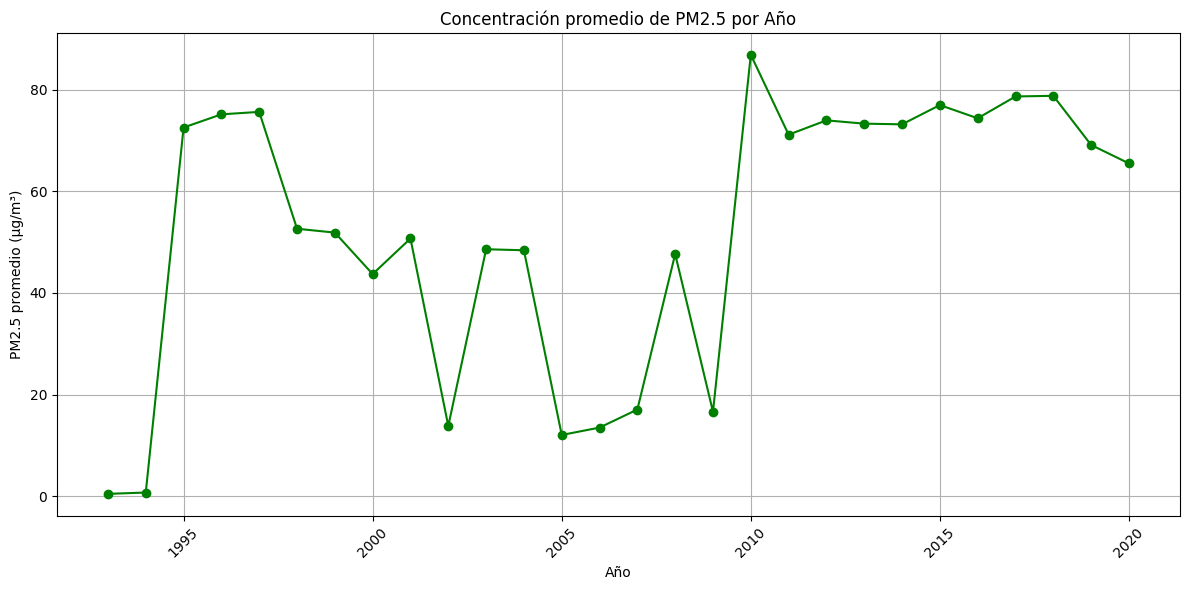

In [ ]:
# Paso 6: Visualización de PM2.5 a lo largo del tiempo
plt.figure(figsize=(12, 6))

# Get the year columns (assuming they are all columns except 'Census Block')
year_columns = df.columns.drop('Census Block')

# Calculate the mean PM2.5 for each year
mean_pm25_by_year = df[year_columns].mean()

plt.plot(mean_pm25_by_year.index, mean_pm25_by_year.values, marker='o', color='green')
plt.title('Concentración promedio de PM2.5 por Año')
plt.xlabel('Año')
plt.ylabel('PM2.5 promedio (µg/m³)')
plt.grid(True)
plt.xticks(rotation=45) # Rotate x-axis labels for better readability
plt.tight_layout() # Adjust layout to prevent labels overlapping
plt.show()

In [ ]:
# Paso 3.1: Eliminar columnas completamente vacías
df = df.dropna(axis=1, how='all')

# Paso 3.2: Eliminar filas con valores nulos
df = df.dropna()

# Paso 3.3: Verificar que las columnas de año sean numéricas
year_columns = [col for col in df.columns if col != 'Census Block']
df[year_columns] = df[year_columns].apply(pd.to_numeric, errors='coerce')

# Paso 3.4: Recalcular la media de PM2.5 por año (ya limpio)
mean_pm25_by_year = df[year_columns].mean()

# Paso 3.5: Mostrar los años con mayor concentración promedio
print("\nTop 5 años con mayor concentración promedio de PM2.5:")
print(mean_pm25_by_year.sort_values(ascending=False).head())



Top 5 años con mayor concentración promedio de PM2.5:
2010    86.826786
2018    78.756895
2017    78.632718
2015    76.941491
1997    75.599435
dtype: float64


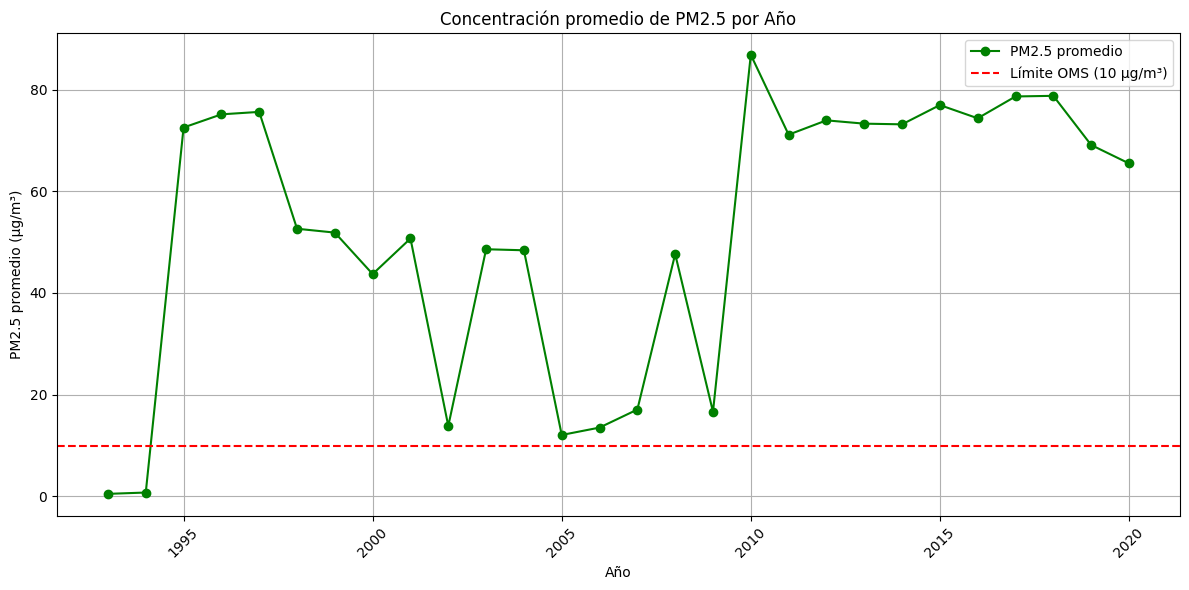

In [ ]:
plt.figure(figsize=(12, 6))
plt.plot(mean_pm25_by_year.index, mean_pm25_by_year.values, marker='o', color='green', label='PM2.5 promedio')
plt.axhline(y=10, color='red', linestyle='--', label='Límite OMS (10 µg/m³)')
plt.title('Concentración promedio de PM2.5 por Año')
plt.xlabel('Año')
plt.ylabel('PM2.5 promedio (µg/m³)')
plt.grid(True)
plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
from sklearn.linear_model import LinearRegression
import numpy as np
# Paso 1: Crear una serie temporal diaria a partir de la media anual
# Supongamos que cada año representa el valor del 1ro de enero de ese año
pm25_series = mean_pm25_by_year.copy()
pm25_series.index = pd.to_datetime(pm25_series.index, format='%Y')


In [ ]:
# Paso 2: Interpolación diaria
daily_pm25 = pm25_series.resample('D').interpolate(method='linear')


In [ ]:
# Paso 3: Preparar datos para regresión
X = np.arange(len(daily_pm25)).reshape(-1, 1)
y = daily_pm25.values

In [ ]:
# Paso 4: Entrenar modelo de regresión lineal
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [ ]:
# Paso 5: Predecir los próximos 2 días
future_days = np.arange(len(daily_pm25), len(daily_pm25) + 2).reshape(-1, 1)
predictions = model.predict(future_days)


In [ ]:
# Paso 6: Mostrar resultados
future_dates = pd.date_range(start=daily_pm25.index[-1] + pd.Timedelta(days=1), periods=2)
predicted_pm25 = pd.Series(predictions, index=future_dates)

print("Predicción de PM2.5 para los próximos 2 días:")
print(predicted_pm25)


Predicción de PM2.5 para los próximos 2 días:
2020-01-02    72.972149
2020-01-03    72.976209
Freq: D, dtype: float64


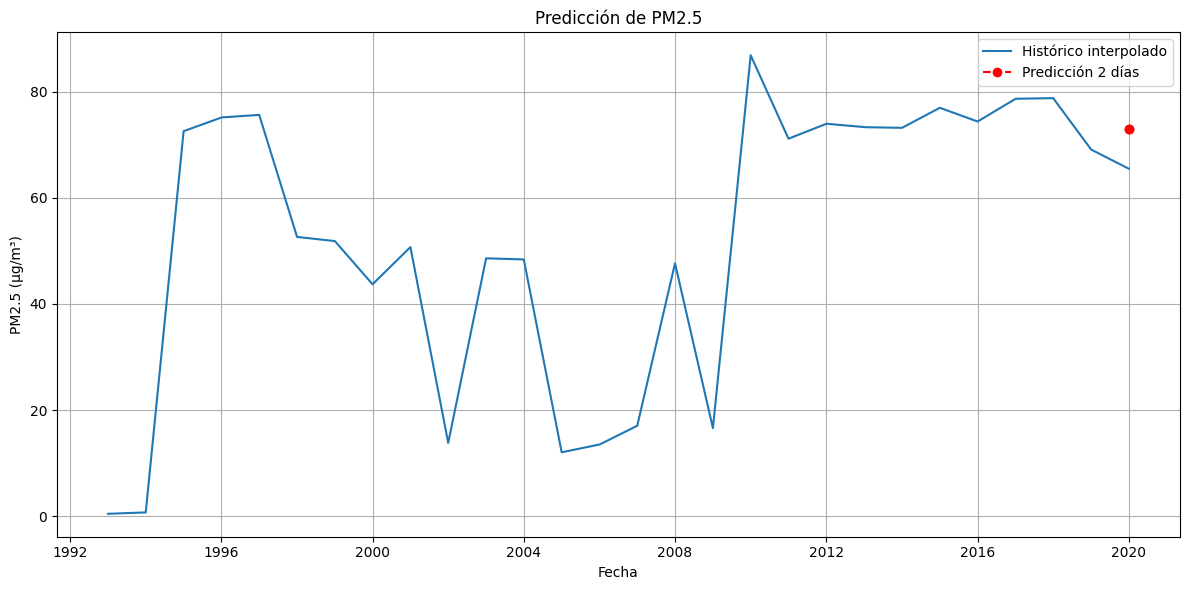

In [ ]:
# Paso 7: Visualización
plt.figure(figsize=(12,6))
plt.plot(daily_pm25.index, daily_pm25.values, label='Histórico interpolado')
plt.plot(predicted_pm25.index, predicted_pm25.values, 'ro--', label='Predicción 2 días')
plt.title('Predicción de PM2.5')
plt.xlabel('Fecha')
plt.ylabel('PM2.5 (µg/m³)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [ ]:
# Paso final: Mostrar predicción numérica de PM2.5 para los próximos 2 días
for fecha, valor in predicted_pm25.items():
    print(f"Fecha: {fecha.strftime('%Y-%m-%d')} → PM2.5 estimado: {valor:.2f} µg/m³")

Fecha: 2020-01-02 → PM2.5 estimado: 72.97 µg/m³
Fecha: 2020-01-03 → PM2.5 estimado: 72.98 µg/m³


In [ ]:
# Paso: Calcular el R² del modelo
r2 = r2_score(y, model.predict(X))
porcentaje_prediccion = r2 * 100

print(f"\nPrecisión del modelo (R²): {r2:.4f}")
print(f"Porcentaje de predicción ajustada: {porcentaje_prediccion:.2f}%")


Precisión del modelo (R²): 0.2308
Porcentaje de predicción ajustada: 23.08%


In [ ]:
# NUEVO CODIGO PARA AMPLIAR LA PREDICCION ENTRE EL (80 a 100)%
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.metrics import r2_score

# Preparar datos
X = np.arange(len(daily_pm25)).reshape(-1, 1)
y = daily_pm25.values

# Transformación polinómica de grado 3
poly = PolynomialFeatures(degree=3)
X_poly = poly.fit_transform(X)

# Entrenar modelo
modelo_poly = LinearRegression()
modelo_poly.fit(X_poly, y)

# Predicción y evaluación
y_pred = modelo_poly.predict(X_poly)
r2 = r2_score(y, y_pred)
print(f"R² con regresión polinómica: {r2:.4f} → {r2*100:.2f}%")

R² con regresión polinómica: 0.3039 → 30.39%
